# Regressão Linear Múltipla
---

<img src="https://selecao.letscode.com.br/favicon.png" width="40px" style="position: absolute; top: 15px; right: 20px; border-radius: 5px;" />

<img src="https://selecao.letscode.com.br/favicon.png" width="40px" style="position: absolute; top: 15px; right: 20px; border-radius: 5px;" />

1. Análise Exploratória dos Dados
2. Criação do Modelo de Regressão Linear Múltipla  
    2.1. Sklearn  
    2.2. StatsModels  
3. Remoção de Outliers
4. Considerando dados categóricos
3. Retirando Variáveis
4. Transformação de Variáveis
5. Na prática: Divisão Treino/Teste
6. Exercício

In [2]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio

# Bibliotecas para RL
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_absolute_error

sns.set()
pio.templates.default = 'plotly_dark'

In [3]:
# Carregando dataset
df = pd.read_csv('https://s3-sa-east-1.amazonaws.com/lcpi/6e4f0eea-5f67-4e91-ae19-8343df190003.csv')

In [4]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [6]:
df.shape

(159, 7)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,159.0,398.326415,357.978317,0.0000,120.00000,273.0000,650.0000,1650.000
Length1,159.0,26.247170,9.996441,7.5000,19.05000,25.2000,32.7000,59.000
Length2,159.0,28.415723,10.716328,8.4000,21.00000,27.3000,35.5000,63.400
Length3,159.0,31.227044,11.610246,8.8000,23.15000,29.4000,39.6500,68.000
Height,159.0,8.970994,4.286208,1.7284,5.94480,7.7860,12.3659,18.957
Width,159.0,4.417486,1.685804,1.0476,3.38565,4.2485,5.5845,8.142


In [10]:
df = df[df['Weight'] != 0]

## Análise Exploratória dos Dados

> Como os dados se relacionam?

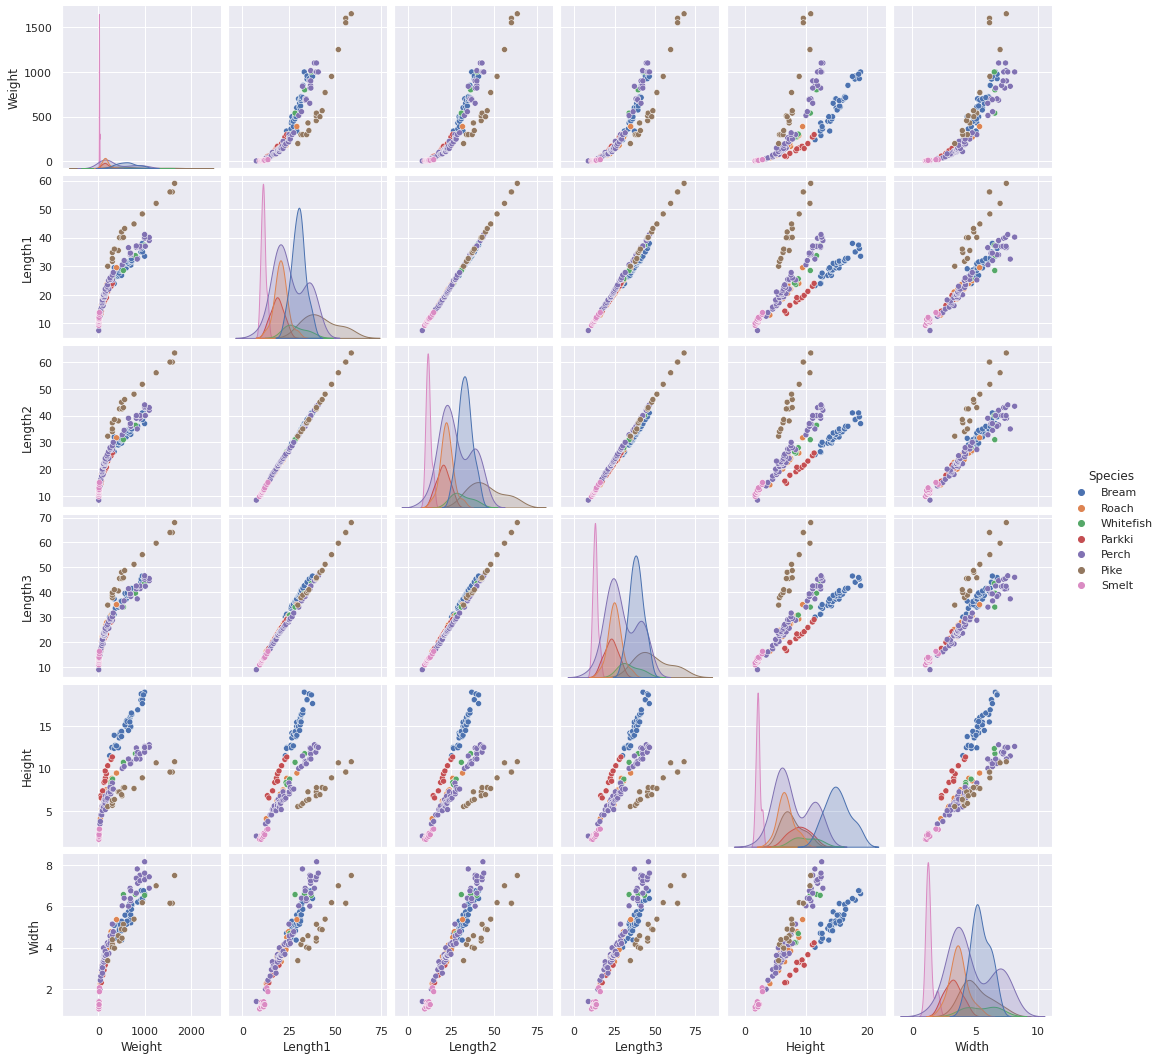

In [12]:
sns.pairplot(df, hue='Species')

In [13]:
# Matriz de correlação
df.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915719,0.918603,0.923090,0.723857,0.886654
Length1,0.915719,1.000000,0.999516,0.992004,0.624409,0.866684
Length2,0.918603,0.999516,1.000000,0.994083,0.639503,0.873201
Length3,0.923090,0.992004,0.994083,1.000000,0.702655,0.878189
Height,0.723857,0.624409,0.639503,0.702655,1.000000,0.792401
Width,0.886654,0.866684,0.873201,0.878189,0.792401,1.000000


<AxesSubplot:>

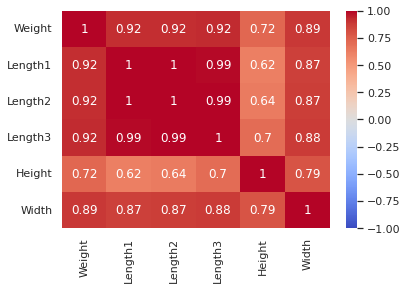

In [15]:
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, vmin=-1, vmax=1)

## Definir a Regressão Linear Múltipla

In [77]:
# X: Length1 Length2 Length3 Height	Width
# y: Weight

In [16]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [20]:
X = df[['Length1', 'Length2', 'Length3', 'Height', 'Width']]
y = df['Weight']

In [18]:
df.select_dtypes(exclude=['object']) # Uma alternativa para remover variáveis categóricas (object)

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936
155,13.4,11.7,12.4,13.5,2.4300,1.2690
156,12.2,12.1,13.0,13.8,2.2770,1.2558
157,19.7,13.2,14.3,15.2,2.8728,2.0672


In [21]:
X.head()

,Length1,Length2,Length3,Height,Width
0,23.2,25.4,30.0,11.5200,4.0200
1,24.0,26.3,31.2,12.4800,4.3056
2,23.9,26.5,31.1,12.3778,4.6961
3,26.3,29.0,33.5,12.7300,4.4555
4,26.5,29.0,34.0,12.4440,5.1340


In [22]:
y.head()

0    242.0
1    290.0
2    340.0
3    363.0
4    430.0
Name: Weight, dtype: float64

---
### Scikit Learn

In [24]:
lr_initial = LinearRegression()

In [25]:
lr_initial.fit(X, y)

LinearRegression()

In [26]:
lr_initial.coef_

array([ 63.96945622,  -9.10851306, -28.11886474,  27.9262076 ,
        23.41231976])

In [27]:
lr_initial.intercept_

-496.8022730138807

In [30]:
# Montando a tabela de coeficientes
pd.DataFrame(lr_initial.coef_, index=X.columns, columns=['Coef'])

,Coef
Length1,63.969456
Length2,-9.108513
Length3,-28.118865
Height,27.926208
Width,23.412320


#### Regressão Linear Simples

$$
y = \beta_0 + \beta_1 \cdot x
$$

#### Regressão Linear Múltipla

$$
    y_i = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + \beta_4 x_4 + \beta_5 x_5
$$

#### Predição para todos os dados do Dataset

In [32]:
y_est = lr_initial.predict(X)

In [33]:
y_est[:5]

array([328.19437418, 370.92535752, 371.80704821, 439.27979128,
       445.91261374])

In [34]:
y[:5]

0    242.0
1    290.0
2    340.0
3    363.0
4    430.0
Name: Weight, dtype: float64

### Statsmodels

In [35]:
x = sm.add_constant(X)

model = sm.OLS(y, x).fit()

In [36]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     235.1
Date:                Fri, 11 Feb 2022   Prob (F-statistic):           1.27e-69
Time:                        14:18:34   Log-Likelihood:                -981.49
No. Observations:                 158   AIC:                             1975.
Df Residuals:                     152   BIC:                             1993.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -496.8023     29.616    -16.775      0.000    -555.315    -438.290
Length1       63.9695     40.169      1.592      0.113     -15.393     143.332
Length2       -9.1085     41.749     -0.218      0.828     -91.592      73.375
Length3      -28.1189     17.343     -1.621      0.107     -62.383       6.145
Height        27.9262      8.721      3.202      0.002      10.696      45.157
Width         23.4123     20.355      1.150      0.252     -16.804      63.628
==============================================================================
Omnibus:                       21.459   Durbin-Watson:                   0.414
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.402
Skew:                           0.801   Prob(JB):                     6.80e-07
Kurtosis:                       4.323   Cond. No.                         315.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Análise do Erro da Regressão

#### 1. A média do erro deve ser zero

#### 2. A distribuição dos erros deve seguir uma distribuição normal

#### 3. Erro deve ser descorrelacionado

## Removendo Outliers

## Modelo de Regressão sem Outliers
---

### Sklearn

### Statsmodels

## Considerando os Dados Categóricos
---

## Avaliando o modelo com a presença dos Dados Categóricos

### Sklearn

### LinearRegression

### Statsmodels

### Remoção de Variáveis Desnecessárias
---

### Sklearn

### Statsmodels

## Transformação de Variáveis
---

### Transformação log & Transformação log-log (duplo)

### Separando as variáveis explicativas e a variável resposta

### Sklearn

### Statsmodels

### Removendo as espécies

### Sklearn

### Statsmodels

### Sklearn

## Treino/Teste
---

1. Processo de treinamento do nosso modelo
2. Processo de teste do nosso modelo

#### Divisão treino-teste

- 70% dos dados para treino
- 30% dos dados para teste

---